# CSE 5334 Programming Assignment 1 (P1)

## Spring 2023

## Due: 11:59pm Central Time, Friday, March 17, 2023

In this assignment, you will implement a toy "search engine" in Python. You code will read a corpus and produce TF-IDF vectors for documents in the corpus. Then, given a query string, you code will return the query answer--the document with the highest cosine similarity score for the query. 

The instructions on this assignment are written in an .ipynb file. You can use the following commands to install the Jupyter notebook viewer. You can use the following commands to install the Jupyter notebook viewer. "pip" is a command for installing Python packages. You are required to use Python 3.5.1 or more recent versions of Python in this project. 

    pip install jupyter

    pip install notebook (You might have to use "sudo" if you are installing them at system level)

To run the Jupyter notebook viewer, use the following command:

    jupyter notebook P1.ipynb

The above command will start a webservice at http://localhost:8888/ and display the instructions in the '.ipynb' file.

### Requirements

* This assignment must be done individually. You must implement the whole assignment by yourself. Academic dishonety will have serious consequences.
* You can discuss topics related to the assignment with your fellow students. But you are not allowed to discuss/share your solution and code.

### Dataset

We use a corpus of 15 Inaugural addresses of different US presidents. We processed the corpus and provided you a .zip file, which includes 15 .txt files.

### Programming Language

1. You are required to use Python 3.5.1 or more recent versions of Python. You are required to submit a single .py file of your code.

2. You are expected to use several modules in NLTK--a natural language processing toolkit for Python. NLTK doesn't come with Python by default. You need to install it and "import" it in your .py file. NLTK's website (http://www.nltk.org/index.html) provides a lot of useful information, including a book http://www.nltk.org/book/, as well as installation instructions (http://www.nltk.org/install.html).

3. In programming assignment 1, other than NLTK, you are not allowed to use any other non-standard Python package. However, you are free to use anything from the the Python Standard Library that comes with Python (https://docs.python.org/3/library/).

### Tasks

You code should accomplish the following tasks:

(1) <b>Read</b> the 15 .txt files, each of which has the transcript of a presidential debate. The following code does it. Make sure to replace "corpusroot" by your directory where the files are stored. In the example below, "corpusroot" is a sub-folder named "US_Inaugural_Addresses" in the folder containing the python file of the code. 

In this assignment we ignore the difference between lower and upper cases. So convert the text to lower case before you do anything else with the text. For a query, also convert it to lower case before you answer the query. 

In [1]:
import os
corpusroot = './US_Inaugural_Addresses'
for filename in os.listdir(corpusroot):
    if filename.startswith('0') or filename.startswith('1'):
        file = open(os.path.join(corpusroot, filename), "r", encoding='windows-1252')
        doc = file.read()
        file.close() 
        doc = doc.lower()

(2) <b>Tokenize</b> the content of each file. For this, you need a tokenizer. For example, the following piece of code uses a regular expression tokenizer to return all course numbers in a string. Play with it and edit it. You can change the regular expression and the string to observe different output results. 

For tokenizing the Presidential debate speeches, let's all use RegexpTokenizer(r'[a-zA-Z]+'). What tokens will it produce? What limitations does it have? 


In [2]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Z]{2,3}[1-9][0-9]{3,3}')
tokens = tokenizer.tokenize("CSE4334 and CSE5334 are taught together. IE3013 is an undergraduate course.")
print(tokens)

['CSE4334', 'CSE5334', 'IE3013']


(3) Perform <b>stopword removal</b> on the obtained tokens. NLTK already comes with a stopword list, as a corpus in the "NLTK Data" (http://www.nltk.org/nltk_data/). You need to install this corpus. Follow the instructions at http://www.nltk.org/data.html. You can also find the instruction in this book: http://www.nltk.org/book/ch01.html (Section 1.2 Getting Started with NLTK). Basically, use the following statements in Python interpreter. A pop-up window will appear. Click "Corpora" and choose "stopwords" from the list.

In [6]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

After the stopword list is downloaded, you will find a file "english" in folder nltk_data/corpora/stopwords, where folder nltk_data is the download directory in the step above. The file contains 179 stopwords. nltk.corpus.stopwords will give you this list of stopwords. Try the following piece of code.

In [7]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

(4) Also perform <b>stemming</b> on the obtained tokens. NLTK comes with a Porter stemmer. Try the following code and learn how to use the stemmer.

In [8]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('studying'))
print(stemmer.stem('vector'))
print(stemmer.stem('entropy'))
print(stemmer.stem('hispanic'))
print(stemmer.stem('ambassador'))

studi
vector
entropi
hispan
ambassador


(5) Using the tokens, we would like to compute the TF-IDF vector for each document. Given a query string, we can also calculate the query vector and calcuate similarity.

In the class, we learned that we can use different weightings for queries and documents and the possible choices are shown below:

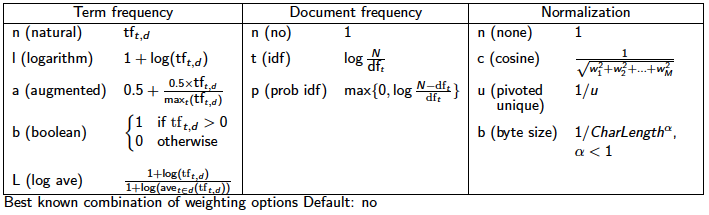

In [9]:
from IPython.display import Image
Image(filename='weighting_scheme.png') 

The notation of a weighting scheme is as follows: ddd.qqq, where ddd denotes the combination used for document vector and qqq denotes the combination used for query vector.

A very standard weighting scheme is: lnc.ltc; where the processing for document and query vectors are as follows:
Document: logarithmic tf, no idf, cosine normalization
Query: logarithmic tf, idf, cosine normalization

Implement a vector space model using the <b>lnc.ltc</b> weighting scheme and show the outputs for the following:

In [ ]:
print("%.12f" % getidf('british'))
print("%.12f" % getidf('union'))
print("%.12f" % getidf('war'))
print("%.12f" % getidf('power'))
print("%.12f" % getidf('great'))
print("--------------")
print("%.12f" % getweight('02_washington_1793.txt','arrive'))
print("%.12f" % getweight('07_madison_1813.txt','war'))
print("%.12f" % getweight('12_jackson_1833.txt','union'))
print("%.12f" % getweight('09_monroe_1821.txt','great'))
print("%.12f" % getweight('05_jefferson_1805.txt','public'))
print("--------------")
print("(%s, %.12f)" % query("pleasing people"))
print("(%s, %.12f)" % query("british war"))
print("(%s, %.12f)" % query("false public"))
print("(%s, %.12f)" % query("people institutions"))
print("(%s, %.12f)" % query("violated willingly"))

### What to Submit 

<b> Submit through Canvas your source code in a single .py file.</b> You can use any standard Python library. The only non-standard library/package allowed for this assignment is NLTK. You .py file must define at least the following functions:

* getidf(token): return the inverse document frequency of a token. If the token doesn't exist in the corpus, return -1. The parameter 'token' is already stemmed. 

* getweight(filemae,token): return the TF-IDF weight of a token in the document named 'filename'. If the token doesn't exist in the document, return 0. The parameter 'token' is already stemmed.  

* query(qstring): return a tuple in the form of (filename of the document, score), where the document is the query answer with respect to the lnc.ltc weighting scheme.

### Evaluation

Your program will be evaluated using the following criteria: 

* Correctness (75 Points)

We will evaluate your code by calling the functions specificed above (getidf - 20 points; getweight - 25 points; query - 30 points). So, make sure to use the same function names, parameter names/types/orders as specified above. We will use the above test cases and other queries and tokens to test your program.

* Efficiency (15 Points)

Don't be satisfied by exhaustive, straightforward implementation. Keep improving its efficiency. An efficient solution should be able to answer a query in a few seconds. Also, it should consider the boundary cases. Your program should behave correctly under special cases and even incorrect input. 

* Clarity, organization, modularity, documentation (10 Points)

Follow good coding standards to make your program easy to understand by others and easy to maintain/extend. 
